In [2]:
#Imports
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Reading Data

#Bitcoin_price, Ethereum_price

"""

Historical Price of Bitcoin, Historical Price of Ethereum
example function call: read_crypto_csv('Users/Avanti/Desktop/INFX_575/Project/Data/', 'bitcoin_price.csv')

"""


def read_crypto_csv(path,filename):
    crypto_df = pd.read_csv(path+filename, parse_dates = ['Date'])
    return crypto_df

In [4]:
ether = read_crypto_csv('/Users/Avanti/Desktop/INFX_575/Project/Data/', 'ethereum_price.csv')
bitcoin = read_crypto_csv('/Users/Avanti/Desktop/INFX_575/Project/Data/', 'bitcoin_price.csv')
litecoin = read_crypto_csv('/Users/Avanti/Desktop/INFX_575/Project/Data/', 'litecoin_price.csv')
ripple = read_crypto_csv('/Users/Avanti/Desktop/INFX_575/Project/Data/', 'ripple_price.csv')
dash = read_crypto_csv('/Users/Avanti/Desktop/INFX_575/Project/Data/', 'dash_price.csv')
monero = read_crypto_csv('/Users/Avanti/Desktop/INFX_575/Project/Data/', 'monero_price.csv')

In [27]:
bitcoin[bitcoin['Date'] == '2016-10-03']['Open'], bitcoin[bitcoin['Date'] == '2017-10-03']['Open']

(365    610.97
 Name: Open, dtype: float64, 0    4408.46
 Name: Open, dtype: float64)

In [5]:
def clean_df(df):
    df = df.groupby('Date').mean()
    return df

In [6]:
#Cleaning Dfs
bitcoin_by_date = clean_df(bitcoin)
ether_by_date = clean_df(ether)
litecoin_by_date = clean_df(litecoin)
ripple_by_date = clean_df(ripple)
dash_by_date = clean_df(dash)
monero_by_date = clean_df(monero)

In [7]:
def create_closing_df(list_of_crptos):
    closing_df = pd.DataFrame()
    for crypto in list_of_crptos:
        closing_df = pd.concat([closing_df,crypto['Close']], axis=1)
    return closing_df

In [8]:
closing_df = create_closing_df([bitcoin, ether, litecoin, ripple, dash, monero])
closing_df.columns = ['Bitcoin', 'Ether', 'Litecoin', 'Ripple', 'Dash', 'Monero']
returns_pct_df = closing_df.pct_change()

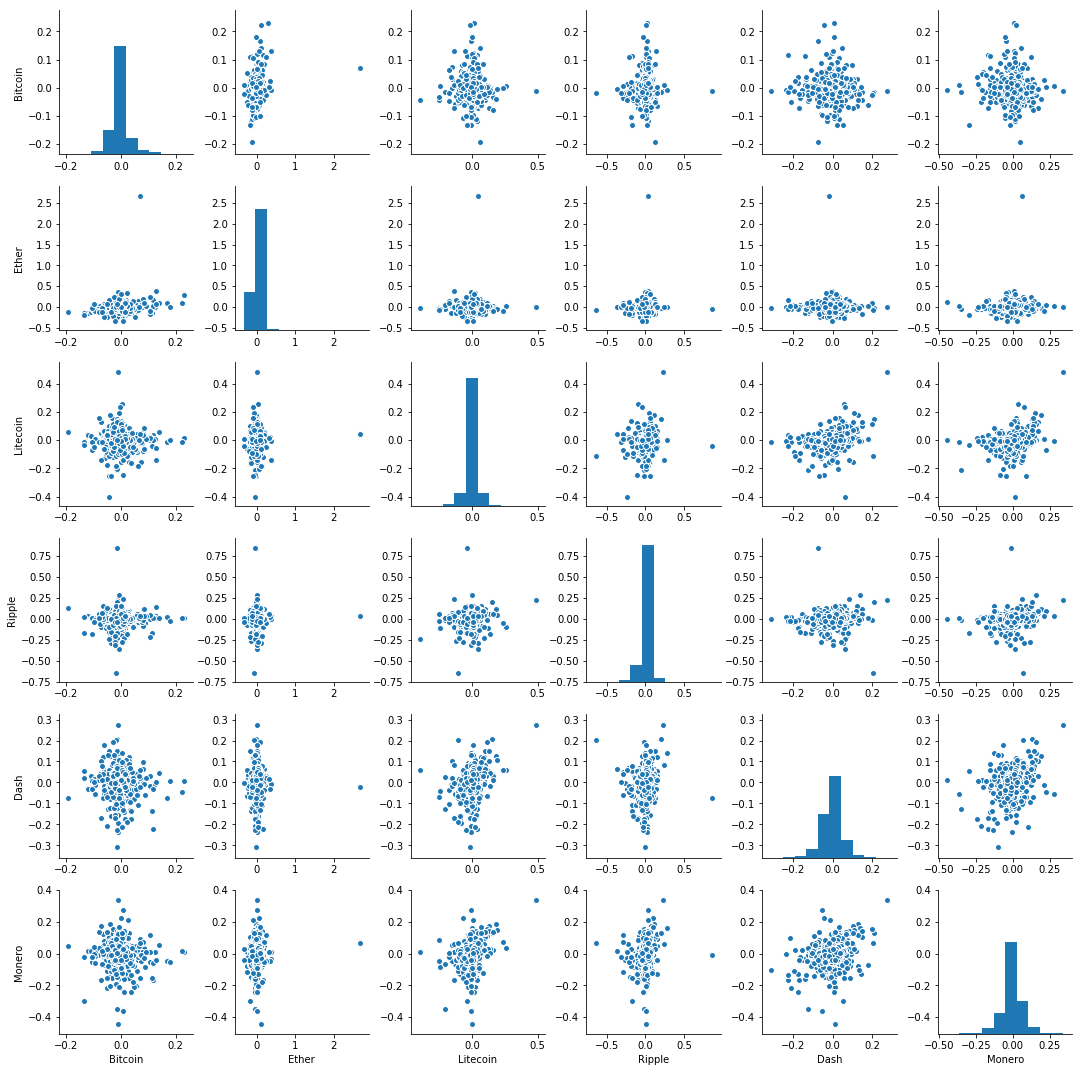

In [30]:
sns.pairplot(returns_pct_df.dropna())

In [14]:
def currency_monte_carlo(start_price, days, mu, sigma,dt):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price

In [41]:
returns_pct_df.describe()

,Bitcoin,Ether,Litecoin,Ripple,Dash,Monero
count,1619.000000,788.000000,1654.000000,1556.000000,1362.000000,1265.000000
mean,-0.001215,-0.001405,0.000613,0.000496,-0.001524,-0.000335
std,0.043416,0.120422,0.065691,0.073718,0.078508,0.075759
min,-0.300543,-0.337899,-0.563501,-0.642048,-0.719327,-0.442692
25%,-0.018022,-0.033447,-0.016076,-0.020133,-0.028976,-0.035183
50%,-0.001891,0.001084,0.000000,0.002911,0.001874,0.001453
75%,0.011263,0.028113,0.017684,0.021360,0.026846,0.033834
max,0.304993,2.677032,0.671840,0.852012,0.596103,0.459677


In [15]:
def run_monte_carlo_analysis(crypto,crypto_str,crypto_start_price, number_of_days, plot_color):
    
    start_price = crypto_start_price
    days = number_of_days
    dt = 1/number_of_days
    returns_pct = returns_pct_df[crypto_str]
    mu = returns_pct.mean()
    sigma = returns_pct.std()
    
    runs = 10000
    simulations = np.zeros(runs)

    for run in range(runs):
        simulations[run] = currency_monte_carlo(start_price, days, mu, sigma,dt)[days -1]
    
    q = np.percentile(simulations, 1)

    plt.hist(simulations, bins = 200, color = plot_color)

    # Starting Price
    plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
    # Mean ending price
    plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

    # Variance of the price (within 99% confidence interval)
    plt.figtext(0.6, 0.6, "VaR(0.95): $%.2f" % (start_price - q,))

    # Display 1% quantile
    plt.figtext(0.15, 0.6, "q(0.95): $%.2f" % q)

    # Plot a line at the 1% quantile result
    plt.axvline(x=q, linewidth=4, color='r')

    # Title
    plt.title(u"Final price distribution for %s after %s days" % (crypto_str,days), weight='bold')
    plt.show()
    return

In [60]:
bitcoin.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-10-03,4408.46,4432.47,4258.89,4317.48,"1,288,020,000","73,181,300,000"
1,2017-10-02,4395.81,4470.23,4377.46,4409.32,"1,431,730,000","72,963,200,000"
2,2017-10-01,4341.05,4403.74,4269.81,4403.74,"1,208,210,000","72,047,300,000"
3,2017-09-30,4166.11,4358.43,4160.86,4338.71,"1,207,450,000","69,136,600,000"
4,2017-09-29,4171.62,4214.63,4039.29,4163.07,"1,367,050,000","69,219,200,000"


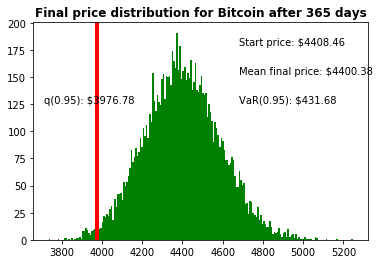

In [61]:
run_monte_carlo_analysis(bitcoin,'Bitcoin',4408.46,365,'green')

In [42]:
ether.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-10-03,297.48,300.11,288.13,292.46,"321,680,000","28,238,500,000"
1,2017-10-02,302.48,302.92,294.58,297.48,"339,443,000","28,708,500,000"
2,2017-10-01,301.55,303.19,295.06,302.34,"306,185,000","28,615,200,000"
3,2017-09-30,291.48,303.96,291.11,301.46,"332,439,000","27,655,200,000"
4,2017-09-29,299.12,299.92,279.77,291.47,"541,375,000","28,375,900,000"


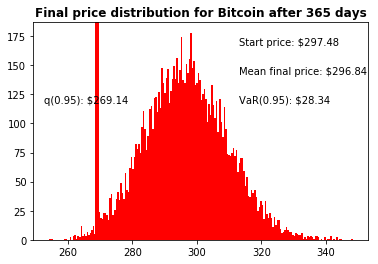

In [43]:
run_monte_carlo_analysis(bitcoin,'Bitcoin',297.48,365,'red')

In [46]:
ripple.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-11-07,0.205103,0.211375,0.203978,0.210354,"114,073,000","7,902,920,000"
1,2017-11-06,0.201967,0.208662,0.201410,0.205990,"102,233,000","7,782,080,000"
2,2017-11-05,0.203274,0.205124,0.201117,0.202055,"46,959,000","7,832,450,000"
3,2017-11-04,0.208083,0.208479,0.202133,0.203750,"74,013,200","8,017,770,000"
4,2017-11-03,0.206205,0.228026,0.201728,0.208133,"373,402,000","7,945,410,000"


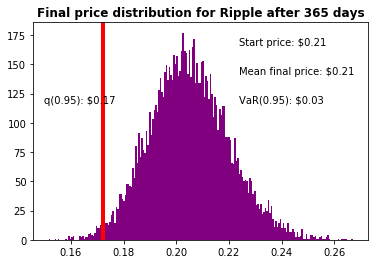

In [47]:
run_monte_carlo_analysis(ripple,'Ripple',0.205103,365,'purple')

In [50]:
litecoin.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-11-07,54.99,63.81,54.99,61.30,"402,670,000","2,953,400,000"
1,2017-11-06,54.76,56.17,53.95,55.17,"133,918,000","2,940,380,000"
2,2017-11-05,55.03,55.48,54.63,54.75,"84,302,000","2,953,940,000"
3,2017-11-04,56.22,56.37,54.94,55.04,"83,633,100","3,016,940,000"
4,2017-11-03,54.58,56.29,54.28,56.18,"150,030,000","2,928,260,000"


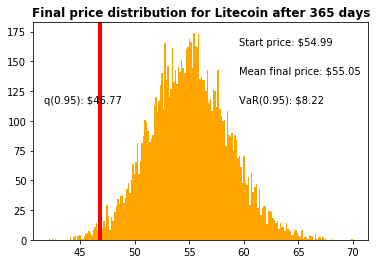

In [52]:
run_monte_carlo_analysis(litecoin,'Litecoin',54.99,365,'orange')

In [54]:
dash.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-11-07,274.87,304.55,274.87,293.38,"92,431,200","2,109,120,000"
1,2017-11-06,273.47,280.44,268.46,275.68,"60,053,700","2,097,820,000"
2,2017-11-05,274.33,277.00,270.29,273.17,"41,028,900","2,103,900,000"
3,2017-11-04,278.58,280.96,271.31,274.68,"49,462,600","2,135,920,000"
4,2017-11-03,263.89,281.39,262.98,278.59,"62,984,900","2,021,200,000"


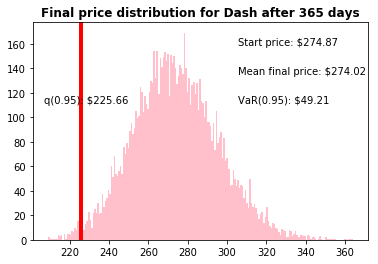

In [55]:
run_monte_carlo_analysis(dash,'Dash',274.87,365,'pink')

In [56]:
monero.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-11-07,104.23,104.75,95.05,99.76,"81,253,300","1,596,750,000"
1,2017-11-06,86.42,102.92,86.15,102.92,"103,722,000","1,323,540,000"
2,2017-11-05,87.31,88.04,86.04,86.35,"27,619,800","1,336,790,000"
3,2017-11-04,87.90,88.48,85.50,87.30,"23,011,500","1,345,360,000"
4,2017-11-03,83.53,90.14,83.53,87.99,"37,321,100","1,278,080,000"


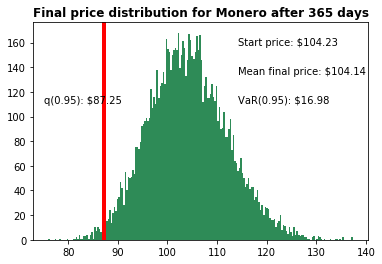

In [59]:
run_monte_carlo_analysis(monero,'Monero',104.23,365,'seagreen')

Crucially, Monte Carlo simulations ignore everything that is not built into the price movement (macro trends, company leadership, hype, cyclical factors); in other words, they assume perfectly efficient markets. For example, the fact that Time Warner lowered its guidance for the year on November 4 is not reflected here, except in the price movement for that day, the last value in the data; if that fact were accounted for, the bulk of simulations would probably not predict a modest rise in price.

Read more: Monte Carlo Simulation | Investopedia https://www.investopedia.com/terms/m/montecarlosimulation.asp#ixzz50BU9zLpq 
Follow us: Investopedia on Facebook

https://www.investopedia.com/terms/m/macro-environment.asp

https://www.investopedia.com/terms/b/businesscycle.asp

https://www.investopedia.com/terms/e/efficientmarkethypothesis.asp

https://cointelegraph.com/news/investing-101-how-to-predict-bitcoins-price

Ethereum has been designed to support so-called smart contract applications. A smart contract is a computer program that can automatically execute the terms of a contract when certain conditions are met, potentially taking a lot of the human involvement out of completing a deal. Barclays for example, have used a form of this technology to trade derivatives.

How is it different to bitcoin?

Firstly, Ethereum is a lot younger having only been started in 2014, whereas bitcoin began in 2009. Ether's market cap is at $18.6 billion versus bitcoin's $39.2 billion, according to Coinmarketcap.com.

Ethereum is also focused on smart contracts, while bitcoin is very much about payment technology.

Why has ether rallied so much?

While bitcoin has been getting support from certain governments and investors, the Ethereum blockchain has been backed by corporates wishing to use the technology for smart contract applications.

A group called the Enterprise Ethereum Alliance (EEA) was recently founded to connect large companies to technology vendors in order to work on projects using the blockchain. Companies involved in the launch include JPMorgan, Microsoft and Intel.

On Tuesday, the EEA announced another 86 firms joined the alliance, which is adding growing legitimacy to the cryptocurrency.

At the same time, the rally in bitcoin has seen investors turn to alternative digital currencies as well as attracting a broader investment base. A year ago, over 83 percent of ether buying happened with bitcoin, according to data from CryptoCompare, showing that it was mainly crytocurrency enthusiasts interested in it. As of Wednesday, bitcoin accounted for just over 32 percent of trade while fiat currencies such as the U.S. dollar and Korean won have risen sharply.

"Yes the direct fiat flow options are a fleshing out of the ethereum ecosystem and show its broad appeal," Charles Hayter, CEO of CryptoCompare, told CNBC by email.

# The reason for dip in July2017

The reason for the recent crash in cryprocurruncy was the recent comments by China. The People's Bank of China's meeting with Bitcoin major exchangers. This sparked off rumours about China planning to take further regulatory actions on Bitcoin exchanges. This rumours led to majority of Bitcoin holders trading more volumes of their Bitcoin forcing price to plummet deeply by over 30 per cent.

As you can see, bitcoin did not fare as badly as some of its smaller rivals. The original digital currency is down around 6.5% while Ether, the cryptocurrency associated with the decentralized computing network Ethereum, is down 29%. Ripple dropped a brutal 39%.

The average overall decline is approximately 22.7 %, though it’s important to note some of these currencies are relative minnows. The market cap of bitcoin, the sector’s undisputed heavyweight, is currently around $40 billion while that of dash is $1.3 billion

All of this raises the question of what is driving the decline and whether the prices have bottomed out. Unlike earlier price jolts in the famously volatile digital currency market, there has been no obvious external shock—a major hacking incident or a regulatory crackdown—to explain the current decline.

As such, the dismal July may simply represent the deflating of a bubble inflated by lots of Johnny-come-lately speculators who rushed into the market in May and June. Now, some are suggesting that, in the case of Ethereum, the market has already hit bottom.

Startups, some at an incredibly early stage, have raised over $1 billion so far this year issuing new digital currencies that have been created using the Ethereum network. Greenspan said that scepticism over these projects could be contributing to the price correction.

"Anything that goes up that far, that fast has to have some sort of correction," Greenspan said.